# Star Formation History (SFH) tutorial 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We define a function for formatting the axes' ticks:

In [2]:
def format_axes_ticks(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelsize=14)

The `galapy.StarFormationHistory` module defines classes and functions for modelling the SFH of a galaxy, at given galactic age, for given SFH-parameters. 

It can be imported via:

In [2]:
import galapy.StarFormationHistory as gpsfh

Or called from the global namespace of the library:

```python
>>> import galapy as gp
>>> gp.StarFormationHistory
<module 'galapy.StarFormationHistory' from '/path/to/installed/version/of/galapy/StarFormationHistory.py'>
```

We set a time for quenching, just for showing the behaviour of the functions below when this variable is set. By not passing any value to this argument (or setting it to `None`) the default value is selected.

**Note** that internally, the default value of $\tau_\text{quench}$ is set to $20 \text{Gyr}$ which is a sufficiently large time to not affect in any case the computations (since the Universe is younger than that ;)

In [3]:
tau_quench = 8.e+8

Let's build the sfh-objects from different models:

- **In-Situ** (default)

    Parameter list:
    1. $\Psi_\text{max}$ normalization of the SFR (in $[M_\odot \text{yr}^{-1}]$)
    2. $\tau_\ast$ characteristic time (in $[\text{yr}]$)

In [4]:
sfh_insitu = gpsfh.SFH( tau_quench, model = 'insitu', psi_max = 100, tau_star = 3.e+8 )

- **Constant**

    Parameter list:
    1. $\Psi_\text{const}$ constant value of the SFR (in $[M_\odot \text{yr}^{-1}]$)

In [5]:
sfh_const = gpsfh.SFH( tau_quench, model = 'constant', psi = 1. )

- **Delayed Exponential**

    Parameter list:
    1. $\Psi_\text{norm}$ normalization of the SFR (in $[M_\odot \text{yr}^{-1}]$)
    2. $\kappa$ shape parameter (adimensional)
    3. $\tau_\ast$ characteristic time (in $[\text{yr}]$)

In [6]:
sfh_dexp = gpsfh.SFH( tau_quench, model = 'delayedexp', psi_norm = 1, k_shape = 0.2, tau_star = 1.e+8 )

- **Log-Normal**

    Parameter list:
    1. $\Psi_\text{norm}$ normalization of the SFR (in $[M_\odot \text{yr}^{-1}]$)
    2. $\sigma_\ast$ time span of evolution (adimensional)
    3. $\tau_\ast$ characteristic time (in $[\text{yr}]$)

In [7]:
sfh_lnorm = gpsfh.SFH( tau_quench, model = 'lognormal', psi_norm = 100, sigma_star = 2., tau_star = 3.e+8 )

Each of these objects can model the star formation history at some given galactic age, i.e. the Star Formation Rate (SFR) at given time.

This is achieved by passing to the object itself

- a scalar age:
```python
time = 1.e+8      # time is always expressed in [yr]
sfh_model( time ) # will return a scalar
```
- an array of ages:
```python
time = np.logspace( 6, 9, 100 ) # an array of 100 time values from 10^6 to 10^9 years
sfh_model( time )          # will return an array
```

The latter is the preferred way when using arrays as input (i.e. don't use the first + list comprehension as it is less computationally efficient).

We therefore define an array of times and compute the sfh ($\psi$) at each of these times for the different models:

In [8]:
tau = np.logspace( 6, 10, 200 )
%time psi_insitu = sfh_insitu( tau )
%time psi_const  = sfh_const( tau )
%time psi_dexp   = sfh_dexp( tau )
%time psi_lnorm  = sfh_lnorm( tau )

CPU times: user 6 µs, sys: 8 µs, total: 14 µs
Wall time: 16.2 µs
CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 9.3 µs
CPU times: user 5 µs, sys: 8 µs, total: 13 µs
Wall time: 14.3 µs
CPU times: user 5 µs, sys: 7 µs, total: 12 µs
Wall time: 13.4 µs


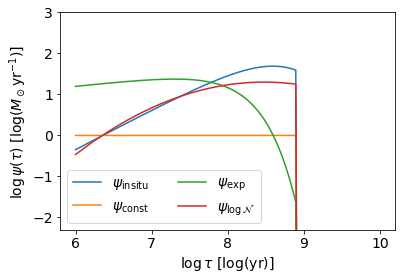

In [9]:
fig = plt.figure( figsize = ( 6,4 ) )
plt.ylim( [ -2.3, 3. ] )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log\\psi(\\tau)$ $[\\log (M_\\odot \\mathrm{yr}^{-1})]$', fontsize = 14 )
# summing an arbitrary small number (1.e-7) to avoid log10(0.) values:
plt.plot( np.log10( tau ), np.log10( psi_insitu + 1.e-7 ), label = '$\\psi_\\mathrm{in situ}$' )
plt.plot( np.log10( tau ), np.log10( psi_const + 1.e-7 ),  label = '$\\psi_\\mathrm{const}$' )
plt.plot( np.log10( tau ), np.log10( psi_dexp + 1.e-7 ),   label = '$\\psi_\\mathrm{exp}$' )
plt.plot( np.log10( tau ), np.log10( psi_lnorm + 1.e-7 ),  label = '$\\psi_{\\log\\mathcal{N}}$' )
plt.legend( fontsize = 14, ncol = 2 )
format_axes_ticks(fig)

As a result of star formation, the total mass of stars hosted in a given galaxy varies while the galaxy ages. We can compute this evolving quantity with the dedicated function `Mstar()`

In [10]:
Mstar_insitu = sfh_insitu.Mstar( tau )
Mstar_const  = sfh_const.Mstar( tau )
Mstar_dexp   = sfh_dexp.Mstar( tau )
Mstar_lnorm  = sfh_lnorm.Mstar( tau )

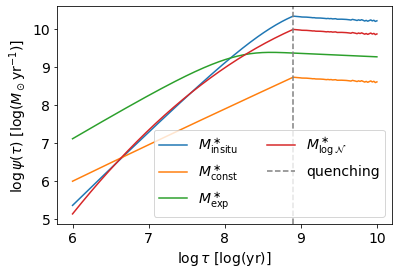

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure( figsize = ( 6,4 ) )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log\\psi(\\tau)$ $[\\log (M_\\odot \\mathrm{yr}^{-1})]$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( Mstar_insitu + 1.e-7 ), label = '$M_\\mathrm{in situ}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_const + 1.e-7 ),  label = '$M_\\mathrm{const}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_dexp + 1.e-7 ),   label = '$M_\\mathrm{exp}^\\ast$' )
plt.plot( np.log10( tau ), np.log10( Mstar_lnorm + 1.e-7 ),  label = '$M_{\\log\\mathcal{N}}^\\ast$' )
plt.axvline( np.log10( tau_quench ), color = 'gray', ls = '--', label = 'quenching')
plt.legend( fontsize = 14, ncol = 2 )
format_axes_ticks(fig)

As shown in the plot above, after quenching, the total stellar mass stops growing (as matter is no longer converted from medium into stars). 

**Note that** the numerical noise present in the latest stages of the in-situ, constant and log-normal evolution is supposedly due to the numerical noise introduced by the integration scheme used in the implementation of this function. 

## Further empirical parameterization

For the empirical SFH models (i.e. **constant**, **delayed-exponential** and **log-normal**) two further parameters can be tuned:

* $M_\text{dust}$: total dust content of the galaxy (default $=10^8\ M_\odot$);
* $Z$: average metallicity of the components (default $= 1 \%$);

The user can modify these additional parameters by calling the usual function `set_parameters`:

```python
md = 1.e+7
zz = 0.02
sfh_empirical.set_parameters( Mdust = md, Zgs = zz )
```
where `md` and `z` are the chosen values for these parameters (in the above example $10^7\;M_\odot$ and $2\%$ respectively).

Note that two assumptions are made:

* the galaxy gas content is authomatically computed as
    $$M_\text{gas} = M_\text{dust} / D$$
    where
    $$D \approx 0.01\; (Z_\text{gas}/Z_\odot)^{-0.85}$$
* the metallicity of the stellar and gas components is the same: $Z_\text{gas} \equiv Z_\ast$

## Derived quantities:

As mentioned above, **in the In-Situ model only** we can compute the derived ISM quantities at varying time (age):

* Dust mass
* Gass mass and metallicity
* Stellar metallicity

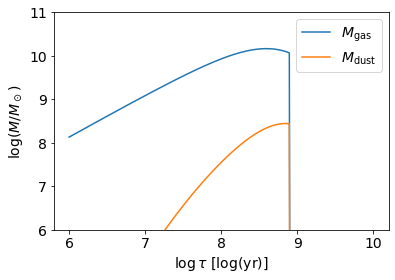

In [12]:
fig = plt.figure( figsize = ( 6,4 ) )
plt.ylim( [ 6., 11. ] )

plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log ( M / M_\\odot)$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Mgas( tau ) + 1.e-7 ), label = '$M_\\mathrm{gas}$' )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Mdust( tau ) + 1.e-7 ), label = '$M_\\mathrm{dust}$' )
plt.legend( fontsize = 14 )
format_axes_ticks(fig)

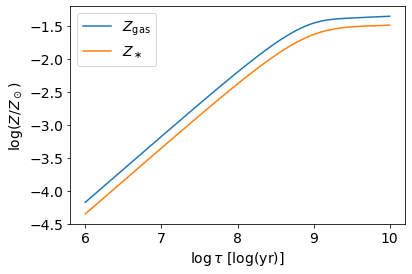

In [13]:
fig = plt.figure( figsize = ( 6,4 ) )
plt.xlabel( '$\\log\\tau$ $[\\log( \\mathrm{yr} )]$', fontsize = 14 )
plt.ylabel( '$\\log ( Z / Z_\\odot)$', fontsize = 14 )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Zgas( tau ) ), label = '$Z_\\mathrm{gas}$' )
plt.plot( np.log10( tau ), np.log10( sfh_insitu.Zstar( tau ) ), label = '$Z_\\ast$' )
plt.legend( fontsize = 14 )
format_axes_ticks(fig)